In [155]:
from google.colab import drive
drive.mount('/content/drive')
# Кластеризация 3 пункт в идеях на kaggle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Новый раздел

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [194]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Course Work/demolitions_pse_isr_conflict_2004-01_to_2023-08.csv')
data_original=data
print(f"СВОЙСТВА ДАТАСЕТА\n\nКоличество строк: {data.shape[0]}\nКоличество столбцов: {data.shape[1]}\n")
data.info()

СВОЙСТВА ДАТАСЕТА

Количество строк: 5765
Количество столбцов: 9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5765 entries, 0 to 5764
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date_of_demolition     5765 non-null   object
 1   locality               5763 non-null   object
 2   district               5763 non-null   object
 3   area                   5765 non-null   object
 4   housing_units          5765 non-null   int64 
 5   people_left_homeless   5765 non-null   int64 
 6   minors_left_homeless   5765 non-null   int64 
 7   type_of_sturcture      5765 non-null   object
 8   reason_for_demolition  5765 non-null   object
dtypes: int64(3), object(6)
memory usage: 405.5+ KB


In [158]:
print("СОДЕРЖАНИЕ ДАТАСЕТА\n")
data.head()

СОДЕРЖАНИЕ ДАТАСЕТА



,date_of_demolition,locality,district,area,housing_units,people_left_homeless,minors_left_homeless,type_of_sturcture,reason_for_demolition
0,2023-08-30,Tarqumya,Hebron,west-bank,2,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
1,2023-08-29,al-Bweirah,Hebron,west-bank,1,0,0,Residental,Demolition on the pretext of unlawful construc...
2,2023-08-24,Shufah,Tulkarm,west-bank,1,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
3,2023-08-21,Bidu,al-Quds,west-bank,8,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
4,2023-08-21,Bidu,al-Quds,west-bank,3,0,0,Non Resedential,Demolition on the pretext of unlawful construc...


In [159]:
print("КОЛИЧЕСТВО NA В ДАТАСЕТЕ ПО СТОЛБЦАМ\n")
data["date_of_demolition"]=pd.to_datetime(data["date_of_demolition"])
data_original=data
data.isna().sum()

КОЛИЧЕСТВО NA В ДАТАСЕТЕ ПО СТОЛБЦАМ



date_of_demolition       0
locality                 2
district                 2
area                     0
housing_units            0
people_left_homeless     0
minors_left_homeless     0
type_of_sturcture        0
reason_for_demolition    0
dtype: int64

In [160]:
data.dropna(inplace=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
housing_units,5763.0,1.355197,1.160790,0.0,1.0,1.0,1.0,24.0
people_left_homeless,5763.0,4.108277,8.168229,0.0,0.0,1.0,7.0,340.0
minors_left_homeless,5763.0,0.833073,2.290262,0.0,0.0,0.0,0.0,52.0


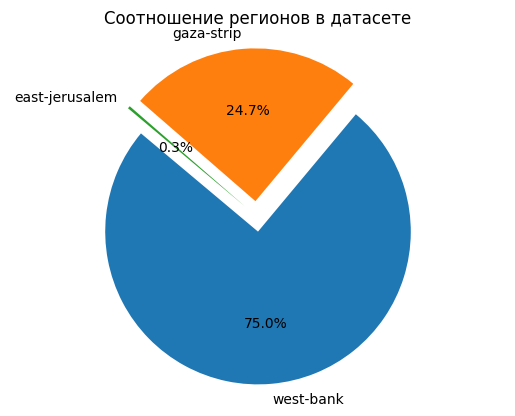

In [161]:
value_counts = data['area'].value_counts()
explode = (0.1, 0.1, 0.1)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140,explode=explode)
plt.title('Соотношение регионов в датасете')
plt.axis('equal');

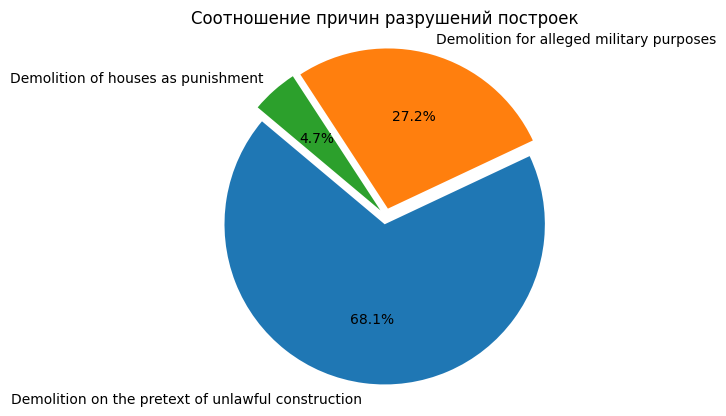

In [162]:
value_counts = data['reason_for_demolition'].value_counts()
explode = (0.05, 0.05, 0.05)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140,explode=explode)
plt.title('Соотношение причин разрушений построек')
plt.axis('equal');

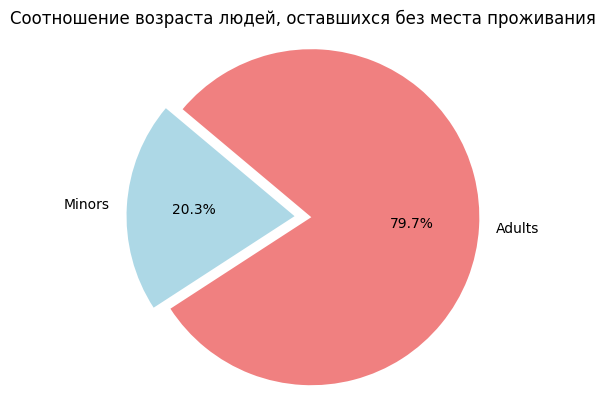

In [163]:
total_people_left_homeless = data['people_left_homeless'].sum()
minors_left_homeless =  data['minors_left_homeless'].sum()
percentage_minors = (minors_left_homeless / total_people_left_homeless) * 100
percentage_adults = 100 - percentage_minors
labels = ['Minors', 'Adults']
sizes = [percentage_minors, percentage_adults]
colors = ['lightblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=140,explode=(0.05,0.05))
plt.title('Соотношение возраста людей, оставшихся без места проживания')
plt.axis('equal')
plt.show()

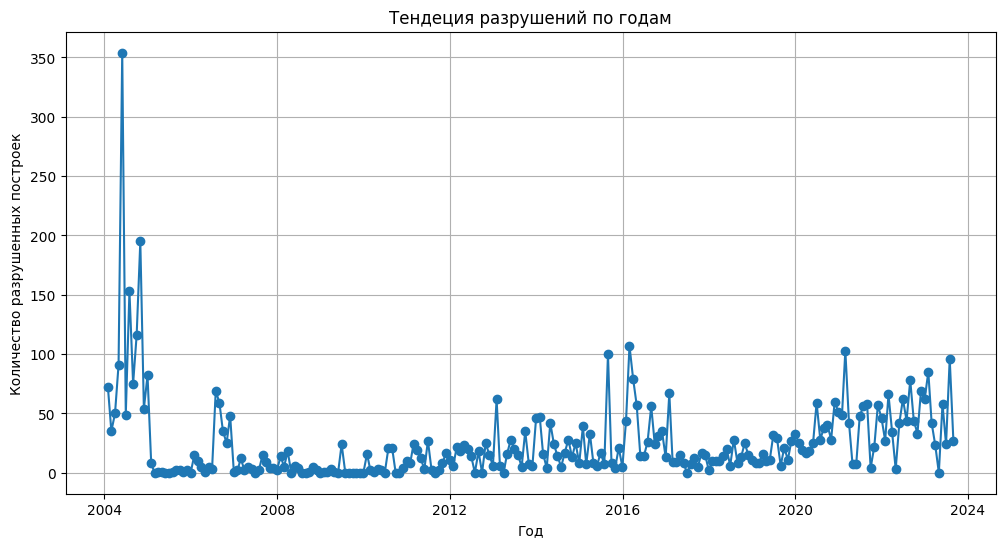

In [164]:
data['date_of_demolition'] = pd.to_datetime(data['date_of_demolition'])
data.set_index('date_of_demolition', inplace=True)
data_resampled = data.resample('M').count()
plt.figure(figsize=(12, 6))
plt.plot(data_resampled.index, data_resampled['locality'], marker='o')
plt.title('Тендеция разрушений по годам')
plt.xlabel('Год')
plt.ylabel('Количество разрушенных построек')
plt.grid()
plt.show()

In [172]:
locality_counts = data['locality'].value_counts()
print("СПИСОК РАЙОНОВ С НАИБОЛЬШИМ КОЛИЧЕСТВОМ РАЗРУШЕНИЙ ПО УБЫВАНИЮ\n")
print(locality_counts)

СПИСОК РАЙОНОВ С НАИБОЛЬШИМ КОЛИЧЕСТВОМ РАЗРУШЕНИЙ ПО УБЫВАНИЮ

Rafah            519
Khan Yunis       269
Rafah R.C.       223
Kh. Tana         174
Kh. Humsah       119
                ... 
Masafer Yatta      1
Abu Tur            1
Bir 'Unah          1
'Izbat Shufah      1
Kh. a-Samiah       1
Name: locality, Length: 429, dtype: int64


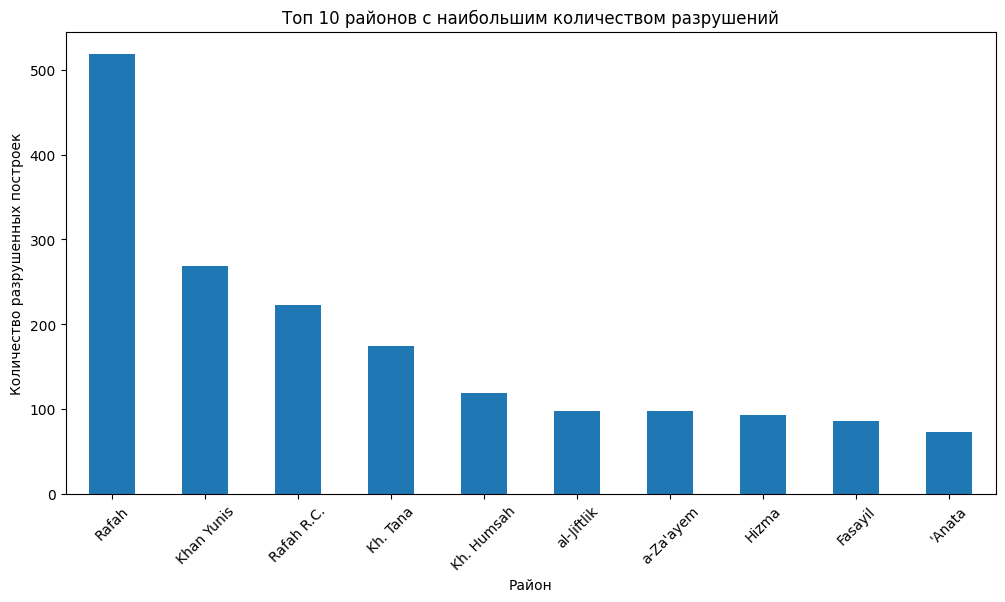

In [173]:
top_10_localities = locality_counts.head(10).index.tolist()
filtered_locality_counts = locality_counts[top_10_localities]
plt.figure(figsize=(12, 6))
filtered_locality_counts.plot(kind='bar')
plt.title('Топ 10 районов с наибольшим количеством разрушений')
plt.xlabel('Район')
plt.ylabel('Количество разрушенных построек')
plt.xticks(rotation=45)
plt.show()

In [171]:
district_counts = data['district'].value_counts()
print("СПИСОК ГОРОДОВ С НАИБОЛЬШИМ КОЛИЧЕСТВОМ РАЗРУШЕНИЙ ПО УБЫВАНИЮ\n")
print(district_counts)

СПИСОК ГОРОДОВ С НАИБОЛЬШИМ КОЛИЧЕСТВОМ РАЗРУШЕНИЙ ПО УБЫВАНИЮ

Hebron                  784
Rafah                   744
Tubas                   708
al-Quds                 693
Jericho                 500
Nablus                  466
Khan Yunis              424
Ramallah and al-Bira    345
Jenin                   278
Bethlehem               258
North Gaza              168
Salfit                  106
Qalqiliya               105
Tulkarm                  79
Deir al-Balah            44
Gaza                     42
East Jerusalem           19
Name: district, dtype: int64


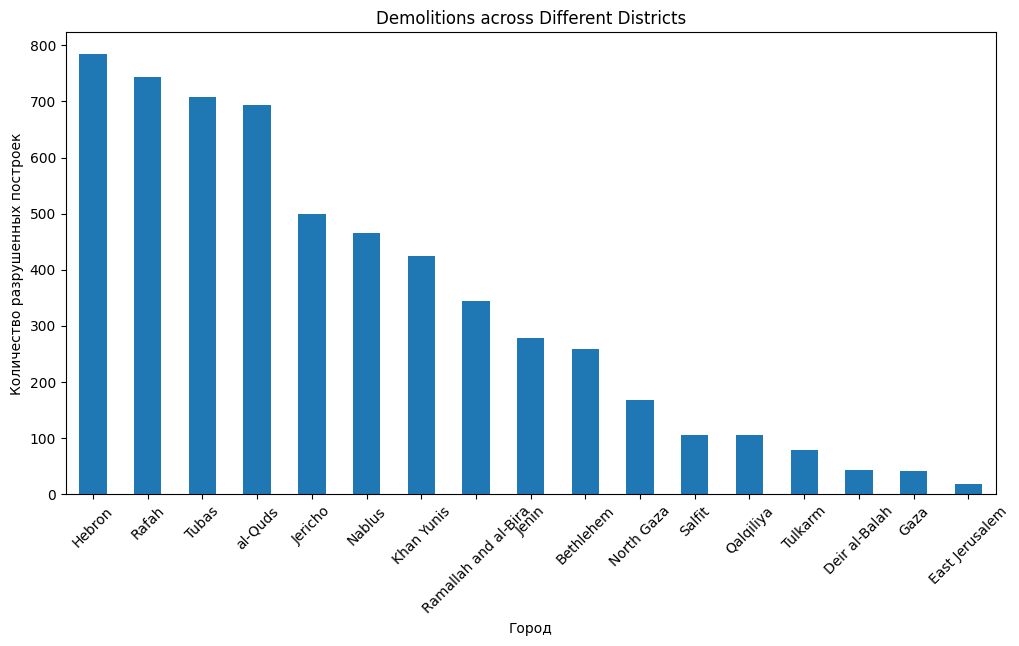

In [174]:
plt.figure(figsize=(12, 6))
district_counts.plot(kind='bar')
plt.title('Распределение разрушений по городам')
plt.xlabel('Город')
plt.ylabel('Количество разрушенных построек')
plt.xticks(rotation=45)
plt.savefig("3.png")
plt.show()

In [175]:
area_counts = data['area'].value_counts()
print("КОЛИЧЕСТВО РАЗРУШЕННЫХ ПОСТРОЕК ПО РЕГИОНАМ\n")
print(area_counts)

КОЛИЧЕСТВО РАЗРУШЕННЫХ ПОСТРОЕК ПО РЕГИОНАМ

west-bank         4325
gaza-strip        1422
east-jerusalem      16
Name: area, dtype: int64


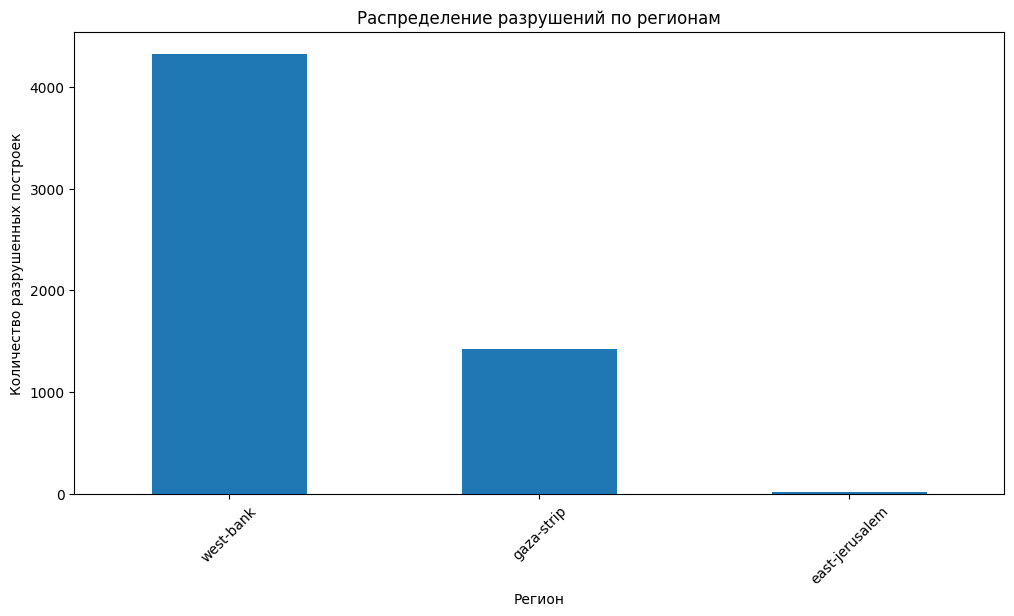

In [176]:
plt.figure(figsize=(12, 6))
area_counts.plot(kind='bar')
plt.title('Распределение разрушений по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество разрушенных построек')
plt.xticks(rotation=45)
plt.savefig("4.png")
plt.show()

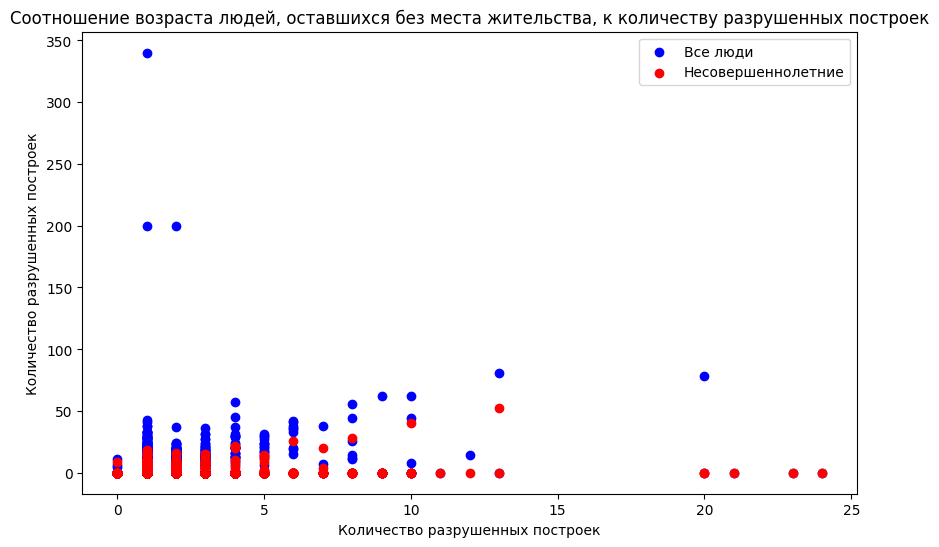


КОЭФФИЦИЕНТ КОРЕЛЛЯЦИИ

                      housing_units  people_left_homeless  \
housing_units              1.000000              0.102069   
people_left_homeless       0.102069              1.000000   
minors_left_homeless       0.069962              0.330676   

                      minors_left_homeless  
housing_units                     0.069962  
people_left_homeless              0.330676  
minors_left_homeless              1.000000  


In [181]:
relevant_data = data[['housing_units', 'people_left_homeless', 'minors_left_homeless']]
plt.figure(figsize=(10, 6))
plt.scatter(relevant_data['housing_units'], relevant_data['people_left_homeless'], color='b', label='Все люди')
plt.scatter(relevant_data['housing_units'], relevant_data['minors_left_homeless'], color='r', label='Несовершеннолетние')
plt.title('Соотношение возраста людей, оставшихся без места жительства, к количеству разрушенных построек')
plt.xlabel('Количество разрушенных построек')
plt.ylabel('Количество разрушенных построек')
plt.legend()
plt.savefig("5.png")
plt.show()
correlation = relevant_data.corr()
print("\nКОЭФФИЦИЕНТ КОРЕЛЛЯЦИИ\n")
print(correlation)

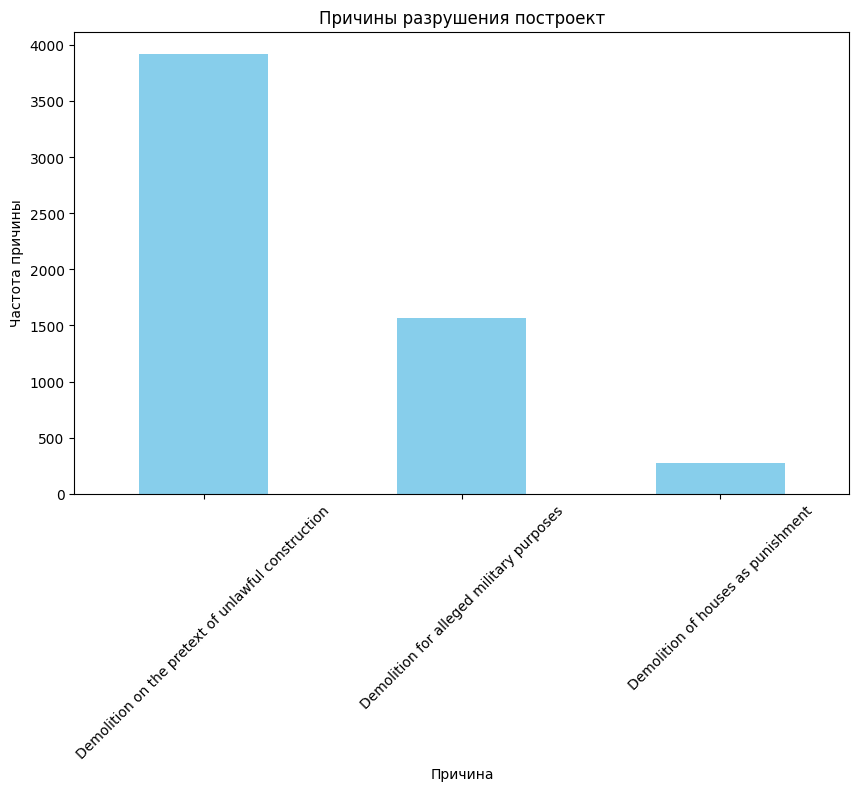

In [182]:
reason_counts = data['reason_for_demolition'].value_counts()
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar', color='skyblue')
plt.title('Причины разрушения построект')
plt.xlabel('Причина')
plt.ylabel('Частота причины')
plt.xticks(rotation=45)
plt.savefig("6.png",  dpi=300, bbox_inches='tight')
plt.show()
reason_percentage = data['reason_for_demolition'].value_counts(normalize=True) * 100

In [183]:
print("\nСООТНОШЕНИЕ ПРИЧИН РАЗРУШЕНИЯ ПОСТРОЕК:\n")
print(reason_percentage)


СООТНОШЕНИЕ ПРИЧИН РАЗРУШЕНИЯ ПОСТРОЕК:
Demolition on the pretext of unlawful construction    68.106889
Demolition for alleged military purposes              27.208051
Demolition of houses as punishment                     4.685060
Name: reason_for_demolition, dtype: float64


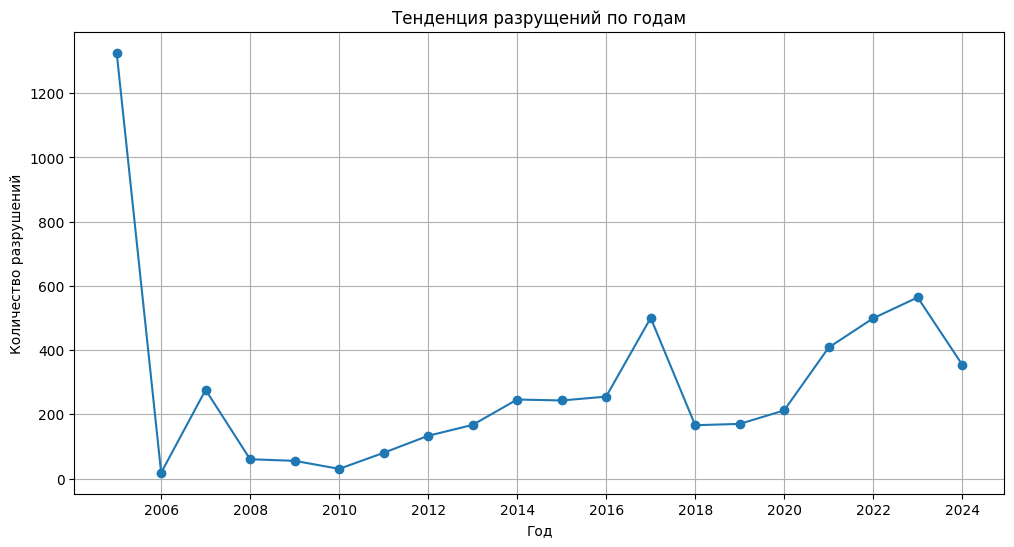

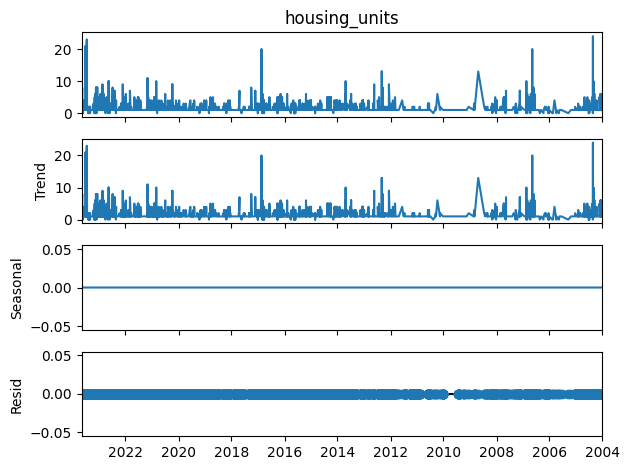

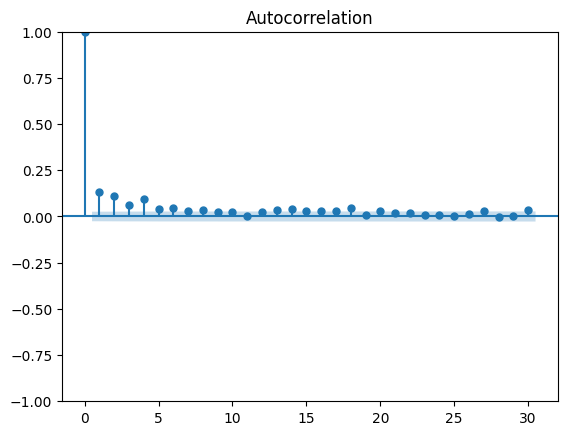

In [185]:
data.index = pd.to_datetime(data.index)
yearly_data = data.resample('Y').count()
yearly_data_types = data['type_of_sturcture']
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['locality'], marker='o')
plt.title('Тенденция разрущений по годам')
plt.xlabel('Год')
plt.ylabel('Количество разрушений')
plt.grid()
plt.savefig("7.png")
plt.show()

result = seasonal_decompose(data['housing_units'], model='additive', period=1)
result.plot()
plt.savefig("7-1.png")
plt.show()

plot_acf(data['housing_units'], lags=30)
plt.savefig("7-2.png")
plt.show()

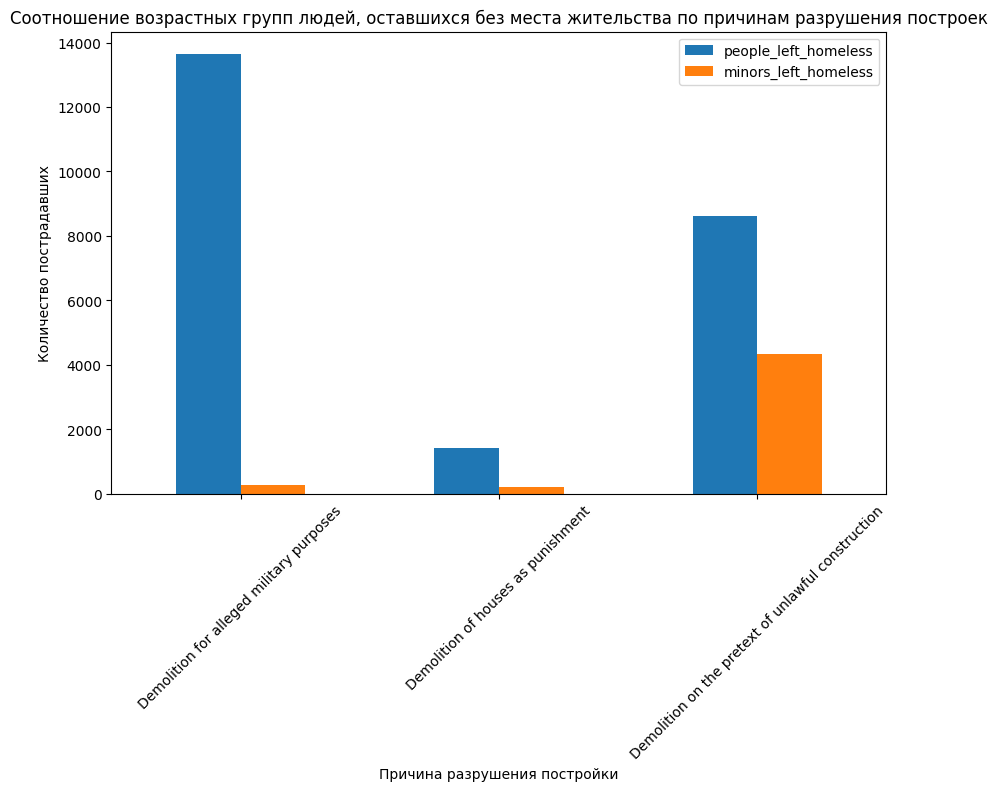

In [186]:
impact_analysis = data.groupby('reason_for_demolition').agg({'people_left_homeless': 'sum', 'minors_left_homeless': 'sum'})
impact_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Соотношение возрастных групп людей, оставшихся без места жительства по причинам разрушения построек')
plt.xlabel('Причина разрушения постройки')
plt.ylabel('Количество пострадавших')
plt.xticks(rotation=45)
plt.savefig("8.png",  dpi=300, bbox_inches='tight')
plt.show()

In [188]:
print("ЧАСТОТА ПРИЧИН РАЗРУШЕНИЯ ПОСТРОЕК В ЗАВИСИМОСТИ ОТ ВОЗРАСТНОЙ ГРУППЫ:\n")
print(impact_analysis)

Частота причин разрушения построек в зависимости от возрастной группы:
                                                    people_left_homeless  \
reason_for_demolition                                                      
Demolition for alleged military purposes                           13656   
Demolition of houses as punishment                                  1417   
Demolition on the pretext of unlawful construction                  8603   

                                                    minors_left_homeless  
reason_for_demolition                                                     
Demolition for alleged military purposes                             270  
Demolition of houses as punishment                                   199  
Demolition on the pretext of unlawful construction                  4332  


In [189]:
structure_counts = data.groupby('type_of_sturcture')['housing_units'].count()
print("Количество разрушенных построек в зависимости от их типа\n")
print(structure_counts)

КОЛИЧЕСТВО РАЗРУШЕННЫХ ПОСТРОЕК В ЗАВИСИМОСТИ ОТ ИХ ТИПА

type_of_sturcture
Non Resedential    2159
Residental         3604
Name: housing_units, dtype: int64


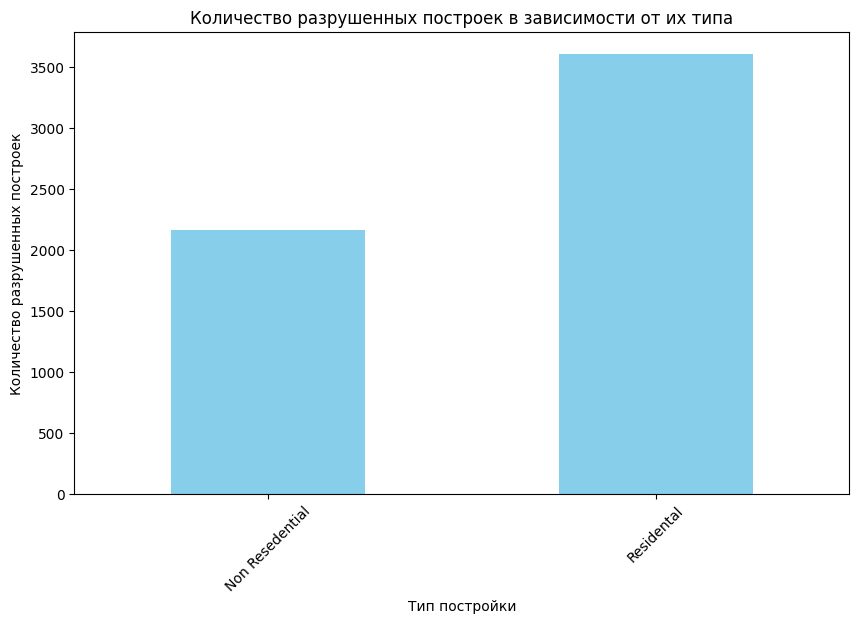

In [192]:
structure_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Количество разрушенных построек в зависимости от их типа')
plt.xlabel('Тип постройки')
plt.ylabel('Количество разрушенных построек')
plt.xticks(rotation=45)
plt.savefig("9.png",  dpi=300, bbox_inches='tight')
plt.show()
structure_percentage = structure_counts / structure_counts.sum() * 100

In [191]:
print("\nСООТНОШЕНИЕ РАЗРУШЕННЫХ ПОСТРОЕК В ЗАВИСИМОСТИ ОТ ИХ ТИПА\n")
print(structure_percentage)


СООТНОШЕНИЕ РАЗРУШЕННЫХ ПОСТРОЕК В ЗАВИСИМОСТИ ОТ ИХ ТИПА

type_of_sturcture
Non Resedential    37.463127
Residental         62.536873
Name: housing_units, dtype: float64


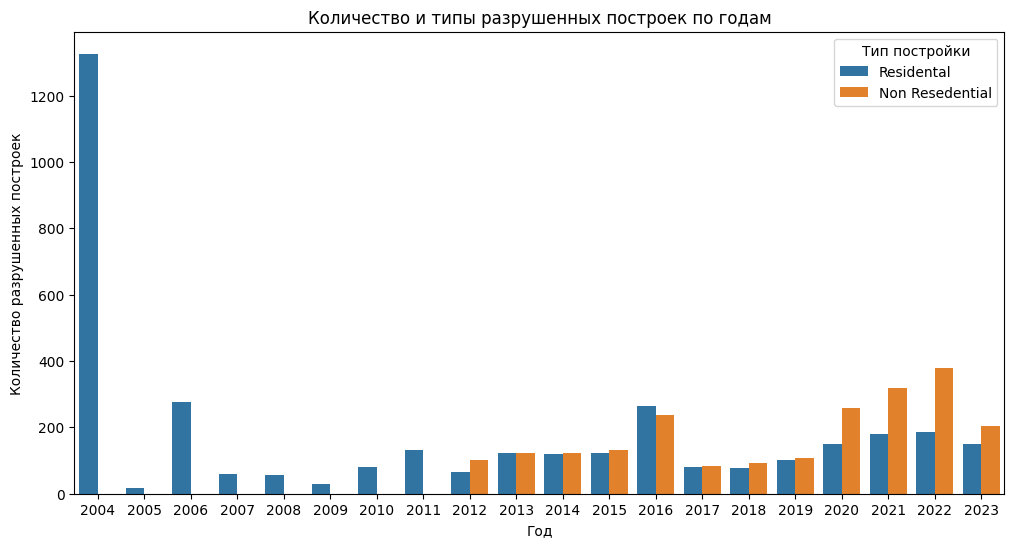

In [198]:
data_original["date_of_demolition"]=pd.to_datetime(data_original['date_of_demolition'], errors='coerce')
grouped_demolition = data.groupby([data_original["date_of_demolition"].dt.year, "type_of_sturcture"]).size()
df_demolition = grouped_demolition.reset_index().rename(columns = {0:'count'})
plt.figure(figsize=(12, 6))
sns.barplot(data=df_demolition, x='date_of_demolition', y='count', hue='type_of_sturcture')
plt.title('Количество и типы разрушенных построек по годам')
plt.xlabel('Год')
plt.ylabel('Количество разрушенных построек')
plt.legend(title='Тип постройки')
plt.show()

<Figure size 640x480 with 0 Axes>

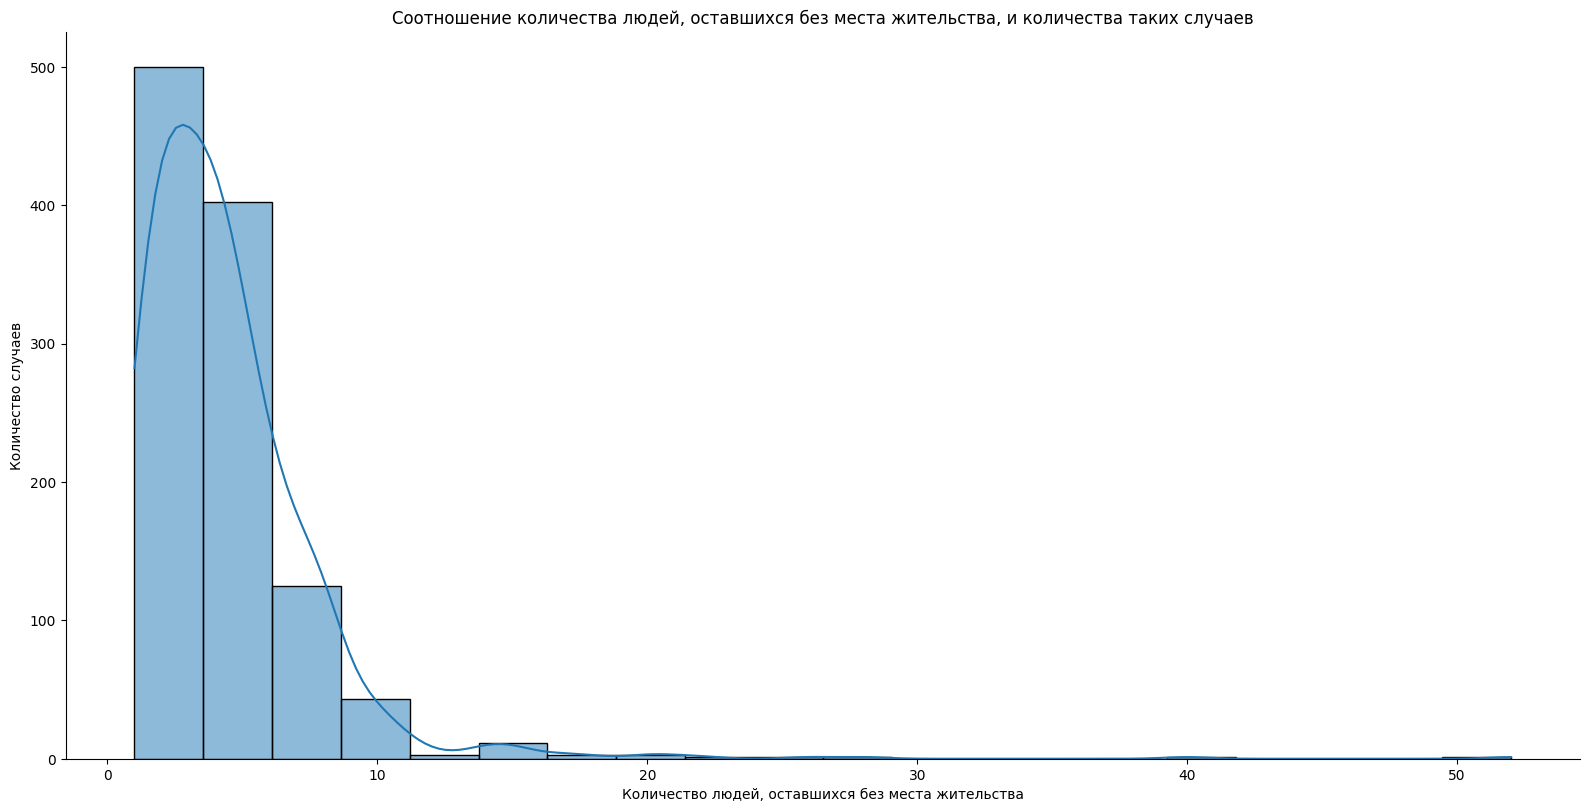

In [203]:
plt.figure()
sns.displot(data[data['minors_left_homeless'] != 0]['minors_left_homeless'], bins=20, kde=True, height=8, aspect=2)
plt.title('Соотношение количества людей, оставшихся без места жительства, и количества таких случаев')
plt.xlabel('Количество людей, оставшихся без места жительства')
plt.ylabel('Количество случаев')
plt.show()